# Klasifikasi Risiko Obesitas dengan  Jenis Kelamin, Usia, dan Variabel GAYA HIDUP DAN FAKTOR KELUARGA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [2]:
df = pd.read_csv('../data/ObesityDataSet.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


# Exploratory Data Analysis (EDA)

In [3]:
print(df.head())

print(df.info())

print(df.describe())

print(df.isnull().sum())

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [4]:
print(df.describe())  # Statistik deskriptif untuk fitur numerik


               Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75% 

In [5]:
df["FCVC"].value_counts()

FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_37020\1722506401.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['NObeyesdad'], palette="bright")


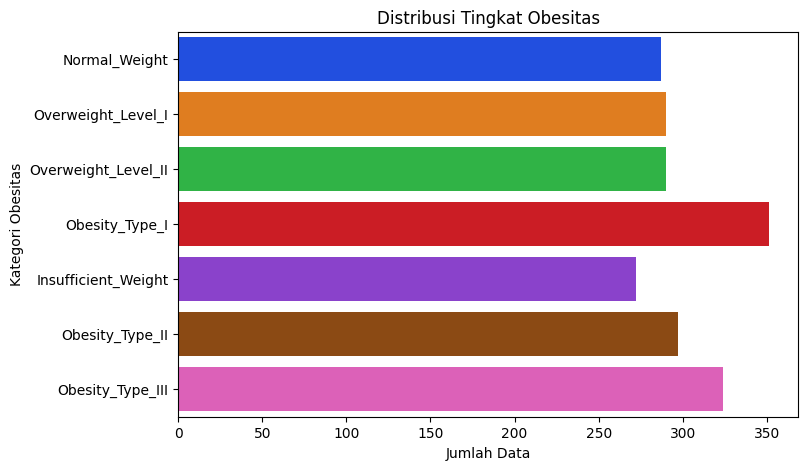

In [6]:
plt.figure(figsize=(8, 5)) 
sns.countplot(y=df['NObeyesdad'], palette="bright") 
plt.title("Distribusi Tingkat Obesitas")
plt.xlabel("Jumlah Data") 
plt.ylabel("Kategori Obesitas")  

plt.show()


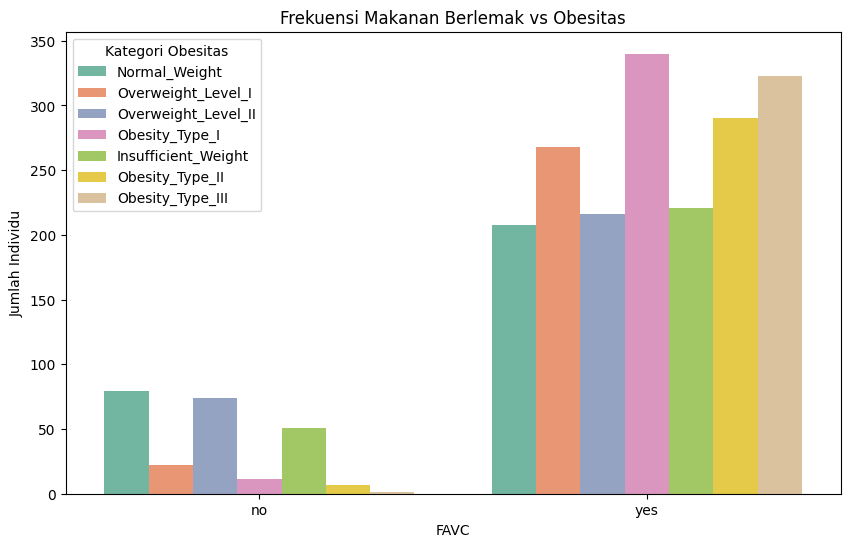

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='FAVC', hue='NObeyesdad', palette='Set2')
plt.title('Frekuensi Makanan Berlemak vs Obesitas')
plt.xlabel('FAVC')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Obesitas')
plt.show()


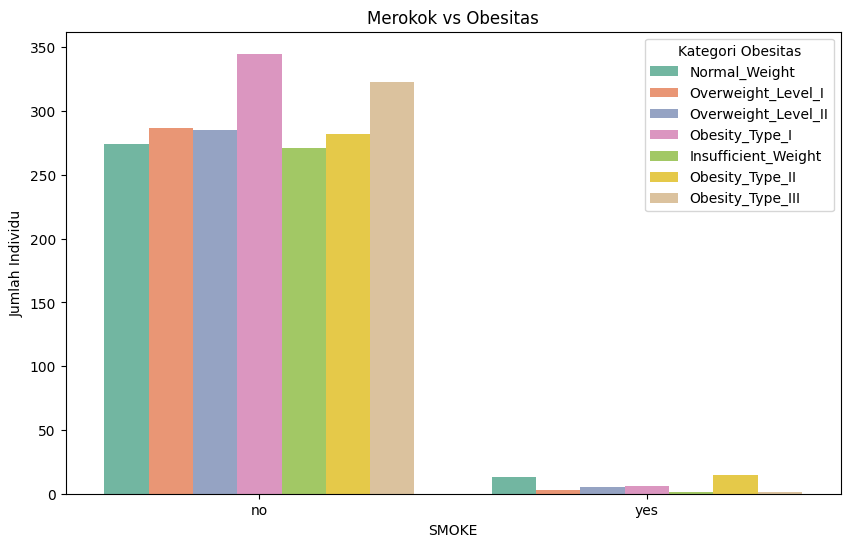

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SMOKE', hue='NObeyesdad', palette='Set2')
plt.title('Merokok vs Obesitas')
plt.xlabel('SMOKE')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Obesitas')
plt.show()

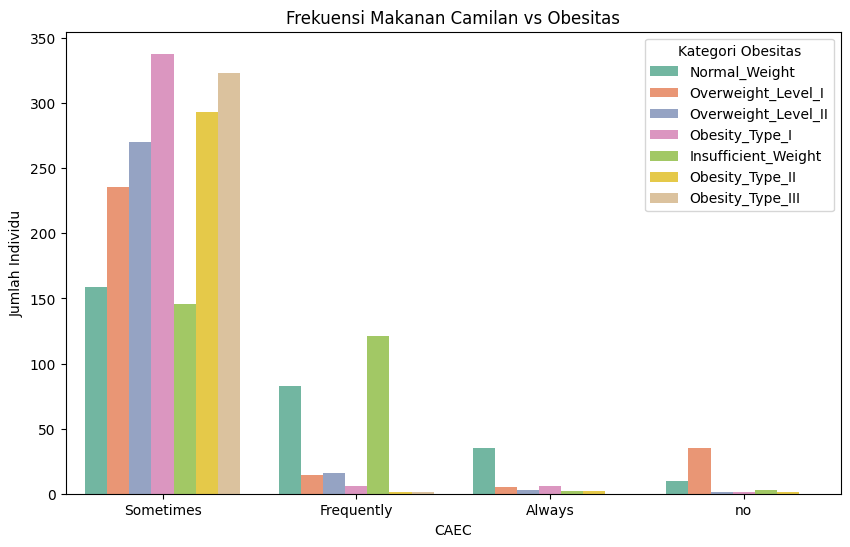

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CAEC', hue='NObeyesdad', palette='Set2')
plt.title('Frekuensi Makanan Camilan vs Obesitas')
plt.xlabel('CAEC')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Obesitas')
plt.show()


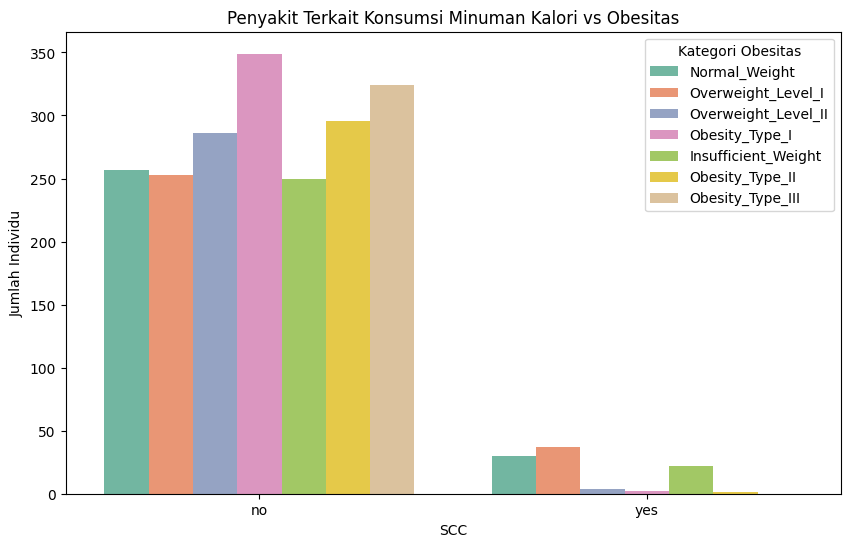

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='SCC', hue='NObeyesdad', palette='Set2')
plt.title('Penyakit Terkait Konsumsi Minuman Kalori vs Obesitas')
plt.xlabel('SCC')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Obesitas')
plt.show()

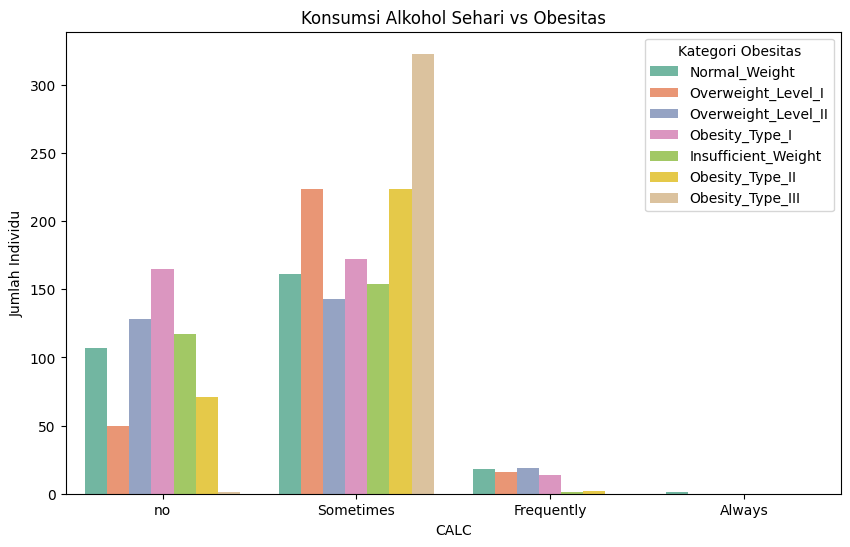

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='CALC', hue='NObeyesdad', palette='Set2')
plt.title('Konsumsi Alkohol Sehari vs Obesitas')
plt.xlabel('CALC')
plt.ylabel('Jumlah Individu')
plt.legend(title='Kategori Obesitas')
plt.show()


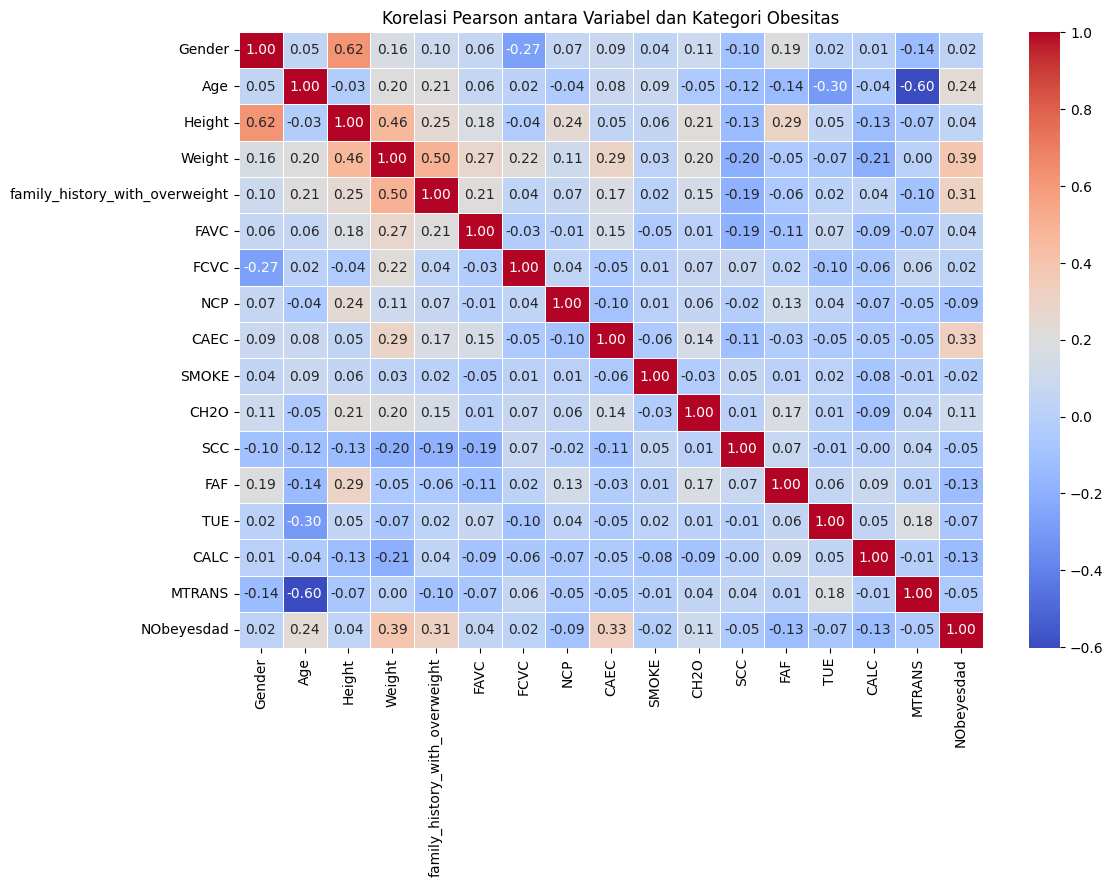

In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Hitung korelasi Pearson
correlation_matrix = df.corr(method='pearson')

# Visualisasi dengan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Pearson antara Variabel dan Kategori Obesitas')
plt.show()

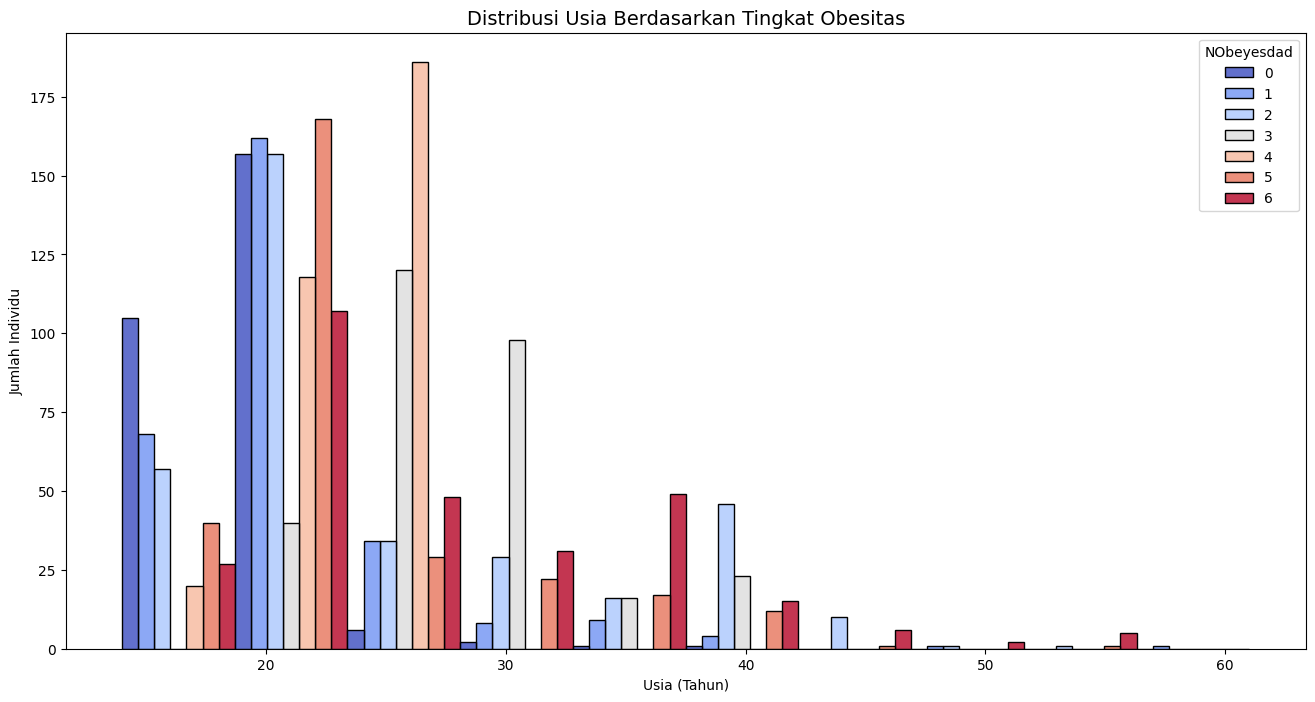

In [13]:
plt.figure(figsize=(16, 8))
ax = sns.histplot(data=df, x='Age', hue='NObeyesdad', palette="coolwarm", bins=10, multiple="dodge", alpha=0.8)
plt.title("Distribusi Usia Berdasarkan Tingkat Obesitas", fontsize=14)
ax.set_xlabel("Usia (Tahun)")
ax.set_ylabel("Jumlah Individu")
plt.show()


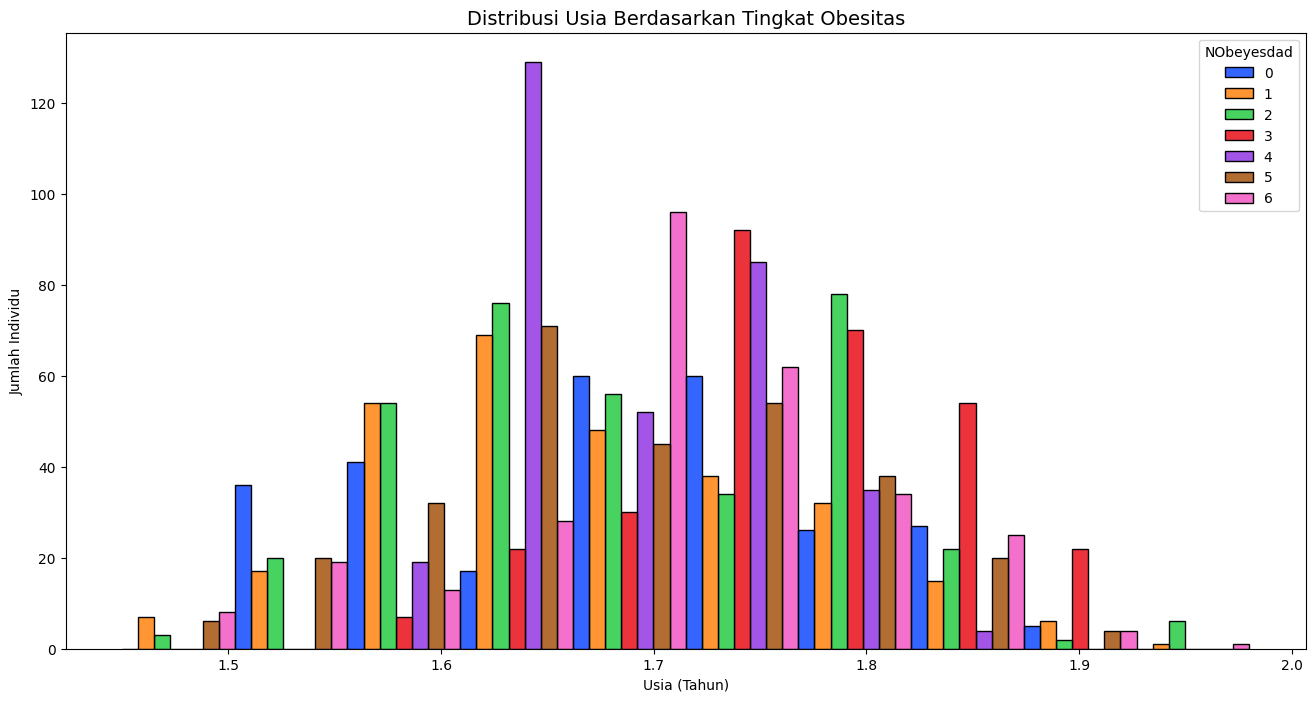

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
ax = sns.histplot(data=df, x='Height', hue='NObeyesdad', palette="bright", bins=10, multiple="dodge", alpha=0.8)
plt.title("Distribusi Usia Berdasarkan Tingkat Obesitas", fontsize=14)
ax.set_xlabel("Usia (Tahun)")
ax.set_ylabel("Jumlah Individu")
plt.show()


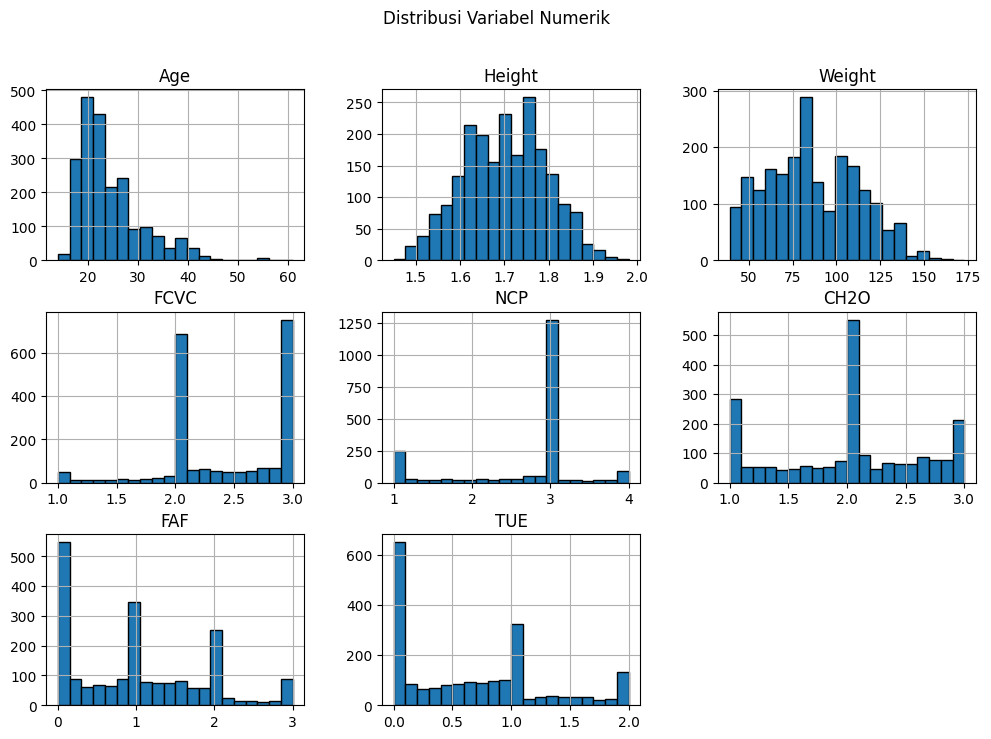

In [15]:
df[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].hist(figsize=(12, 8), bins=20, edgecolor="black")
plt.suptitle("Distribusi Variabel Numerik")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_37020\3147481578.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['NObeyesdad'], y=df['FAF'], ax=ax[0], palette="dark", estimator='mean', ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_37020\3147481578.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['NObeyesdad'], y=df['FAF'], ax=ax[0], palette="dark", estimator='mean', ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_37020\3147481578.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['NObeyesdad'], y=df['TUE'], ax=ax[1], palette="magma", estimator='mean', ci=None)
C:\Users\User\AppData\Local\Temp\ipykernel_37020\3147481578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is depr

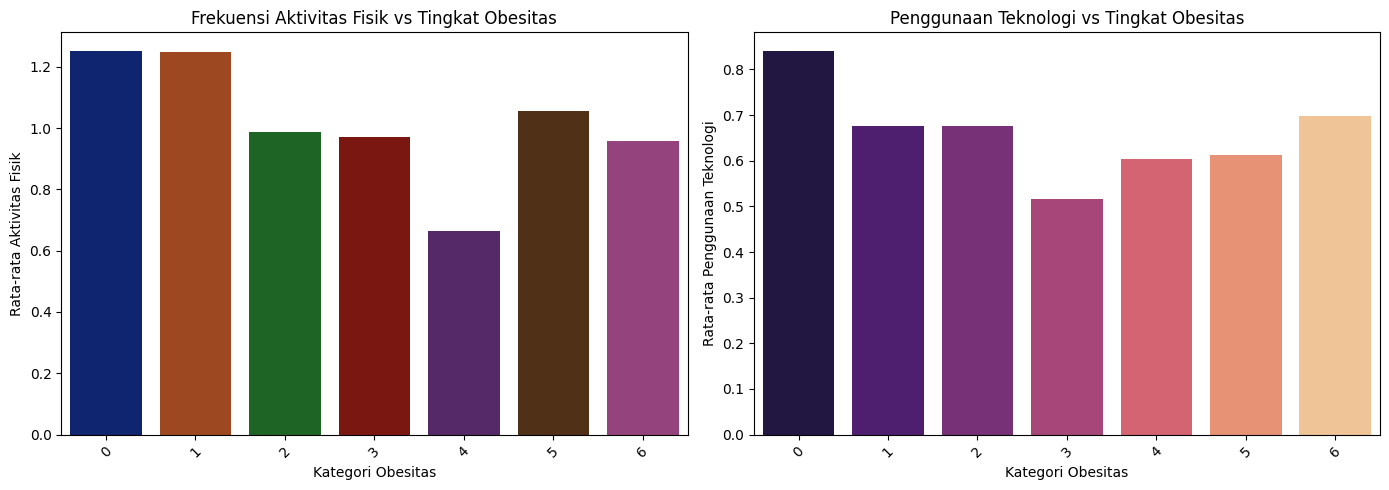

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x=df['NObeyesdad'], y=df['FAF'], ax=ax[0], palette="dark", estimator='mean', ci=None)
ax[0].set_title("Frekuensi Aktivitas Fisik vs Tingkat Obesitas")
ax[0].set_xlabel("Kategori Obesitas")
ax[0].set_ylabel("Rata-rata Aktivitas Fisik")
ax[0].tick_params(axis='x', rotation=45)  # Miringkan label x agar lebih jelas

sns.barplot(x=df['NObeyesdad'], y=df['TUE'], ax=ax[1], palette="magma", estimator='mean', ci=None)
ax[1].set_title("Penggunaan Teknologi vs Tingkat Obesitas")
ax[1].set_xlabel("Kategori Obesitas")
ax[1].set_ylabel("Rata-rata Penggunaan Teknologi")
ax[1].tick_params(axis='x', rotation=45)

# Menampilkan plot
plt.tight_layout()
plt.show()


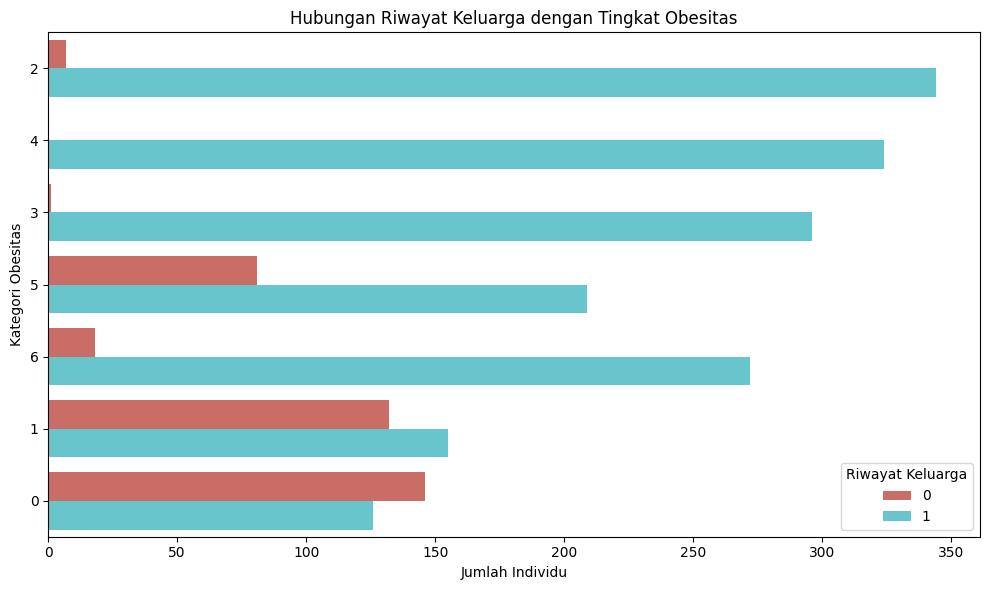

In [17]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df, y='NObeyesdad', hue='family_history_with_overweight', palette='hls', order=df['NObeyesdad'].value_counts().index)

plt.title('Hubungan Riwayat Keluarga dengan Tingkat Obesitas')
plt.ylabel('Kategori Obesitas')
plt.xlabel('Jumlah Individu')
plt.legend(title='Riwayat Keluarga')

plt.tight_layout()
plt.show()

## Data Proceccing

In [18]:
from sklearn.preprocessing import LabelEncoder
features_kategorikal = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Gender','CAEC']
missing_cols = [col for col in features_kategorikal if col not in df.columns]
if missing_cols:
    print(f"Kolom-kolom ini tidak ditemukan di DataFrame df: {missing_cols}")
else:
    print("Semua kolom yang diperlukan ada di DataFrame df.")
label_encoder = LabelEncoder()
for col in features_kategorikal:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])
print(df[features_kategorikal].head())


Semua kolom yang diperlukan ada di DataFrame df.
   family_history_with_overweight  FAVC  SMOKE  SCC  CALC  MTRANS  Gender  \
0                               1     0      0    0     3       3       0   
1                               1     0      1    1     2       3       0   
2                               1     0      0    0     1       3       1   
3                               0     0      0    0     1       4       1   
4                               0     0      0    0     2       3       1   

   CAEC  
0     2  
1     2  
2     2  
3     2  
4     2  


In [19]:
# Kolom target
target = 'NObeyesdad'

# Cek apakah kolom target ada di df
if target in df.columns:
    # Membuat instance LabelEncoder
    label_encoder = LabelEncoder()

    # Melakukan encoding untuk kolom target
    df[target] = label_encoder.fit_transform(df[target])

    # Menampilkan hasil encoding
    print(f"Encoded Target (obesity_level):\n{df[target].head()}")
else:
    print(f"Kolom target '{target}' tidak ditemukan di DataFrame.")

Encoded Target (obesity_level):
0    1
1    1
2    1
3    5
4    6
Name: NObeyesdad, dtype: int64


### Default Modeling

#### Inisiasi Awal

In [20]:
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']
# Split Data
test_size = 0.3
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
# Model Training and Evaluation
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} F1 Score:", f1_score(y_test, y_pred, average='weighted'))
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return f1_score(y_test, y_pred, average='weighted')


#### KNN Model

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_f1 = evaluate_model(knn, "KNN")

KNN F1 Score: 0.8556361350565602
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.94      0.86        86
           1       0.75      0.48      0.59        93
           2       0.88      0.95      0.92       102
           3       0.98      0.95      0.97        88
           4       0.96      1.00      0.98        98
           5       0.77      0.85      0.81        88
           6       0.89      0.85      0.87        79

    accuracy                           0.86       634
   macro avg       0.86      0.86      0.85       634
weighted avg       0.86      0.86      0.86       634

KNN Confusion Matrix:
 [[81  5  0  0  0  0  0]
 [21 45  2  0  0 20  5]
 [ 0  0 97  2  1  1  1]
 [ 0  0  1 84  3  0  0]
 [ 0  0  0  0 98  0  0]
 [ 1  8  2  0  0 75  2]
 [ 0  2  8  0  0  2 67]]


#### SVM Model

In [22]:
svm = SVC(kernel='rbf', C=1.0)
svm_f1 = evaluate_model(svm, "SVM")

SVM F1 Score: 0.5547439930901169
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        86
           1       0.44      0.34      0.39        93
           2       0.58      0.33      0.42       102
           3       0.75      0.47      0.57        88
           4       0.63      1.00      0.77        98
           5       0.50      0.51      0.51        88
           6       0.42      0.53      0.47        79

    accuracy                           0.57       634
   macro avg       0.57      0.57      0.55       634
weighted avg       0.57      0.57      0.55       634

SVM Confusion Matrix:
 [[71 15  0  0  0  0  0]
 [29 32  0  0  0 27  5]
 [ 0  0 34 14 19  2 33]
 [ 0  0  9 41 38  0  0]
 [ 0  0  0  0 98  0  0]
 [ 3 19  2  0  0 45 19]
 [ 0  7 14  0  0 16 42]]


#### Random Forest Model

In [23]:
rf = RandomForestClassifier(n_estimators=100, random_state=random_state)
rf_f1 = evaluate_model(rf, "Random Forest")

Random Forest F1 Score: 0.9436939991173161
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.95      0.97        86
           1       0.83      0.91      0.87        93
           2       0.98      0.96      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.89      0.85      0.87        88
           6       0.96      0.94      0.95        79

    accuracy                           0.94       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.94      0.94       634

Random Forest Confusion Matrix:
 [[82  4  0  0  0  0  0]
 [ 1 85  0  0  0  6  1]
 [ 0  1 98  3  0  0  0]
 [ 0  0  1 87  0  0  0]
 [ 0  0  1  0 97  0  0]
 [ 0 11  0  0  0 75  2]
 [ 0  2  0  0  0  3 74]]


#### XGBoost Model

In [24]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_f1 = evaluate_model(xgb, "XGBoost")

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost F1 Score: 0.9512437851762104
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95        86
           1       0.91      0.85      0.88        93
           2       0.99      0.95      0.97       102
           3       0.97      0.99      0.98        88
           4       1.00      0.99      0.99        98
           5       0.86      0.94      0.90        88
           6       1.00      0.97      0.99        79

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

XGBoost Confusion Matrix:
 [[83  2  0  0  0  1  0]
 [ 5 79  0  0  0  9  0]
 [ 0  0 97  2  0  3  0]
 [ 0  0  1 87  0  0  0]
 [ 0  0  0  1 97  0  0]
 [ 0  5  0  0  0 83  0]
 [ 0  1  0  0  0  1 77]]


#### Visualisasi Performa

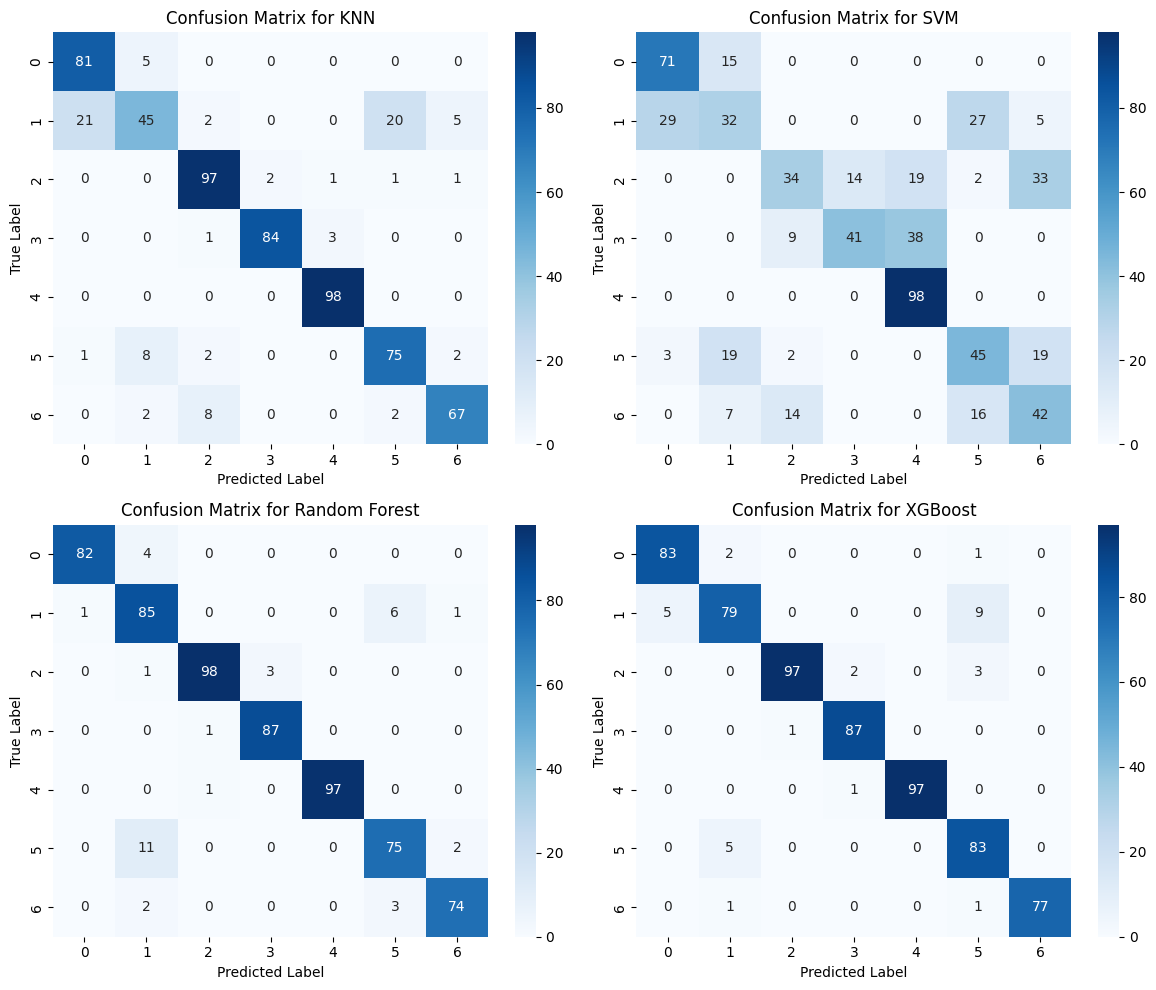

Model Accuracies:
KNN: 0.8628
SVM: 0.5726
Random Forest: 0.9432
XGBoost: 0.9511
           Model  F1-Score
3        XGBoost  0.951244
2  Random Forest  0.943694
0            KNN  0.855636
1            SVM  0.554744


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

def plot_confusion_matrices(models, X_test, y_test):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()
    
    for i, (model_name, model) in enumerate(models.items()):
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=set(y_test), yticklabels=set(y_test), ax=axes[i])
        axes[i].set_xlabel('Predicted Label')
        axes[i].set_ylabel('True Label')
        axes[i].set_title(f'Confusion Matrix for {model_name}')
    
    plt.tight_layout()
    plt.show()

def print_model_accuracies(models, X_test, y_test):
    print("Model Accuracies:")
    for model_name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name}: {accuracy:.4f}")
        
def print_model_f1_scores(models, X_test, y_test):
    f1_scores = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        f1_scores[name] = f1
    
    results_df = pd.DataFrame(list(f1_scores.items()), columns=['Model', 'F1-Score'])
    print(results_df.sort_values(by='F1-Score', ascending=False))

# Define models
test_models = {
    "KNN": knn,
    "SVM": svm,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Plot all confusion matrices in one frame
plot_confusion_matrices(test_models, X_test, y_test)

# Print accuracy of each model
print_model_accuracies(test_models, X_test, y_test)

# Print F1-score of each model
print_model_f1_scores(test_models, X_test, y_test)

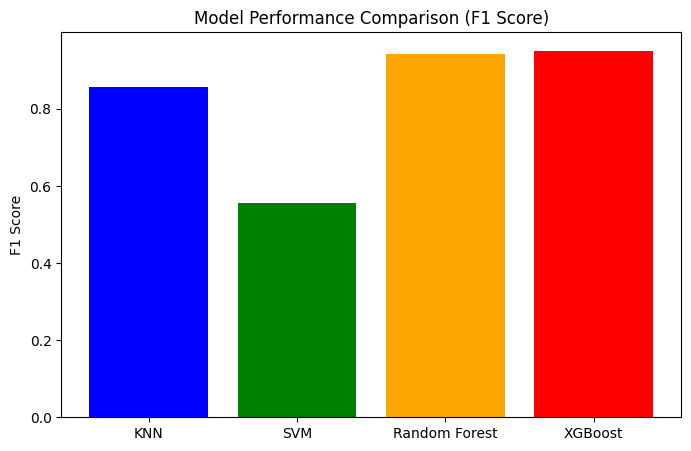

In [26]:
results = {
    "KNN": knn_f1,
    "SVM": svm_f1,
    "Random Forest": rf_f1,
    "XGBoost": xgb_f1
}

plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'orange', 'red'])
plt.title("Model Performance Comparison (F1 Score)")
plt.ylabel("F1 Score")
plt.show()

### Masuk Proceccing Data

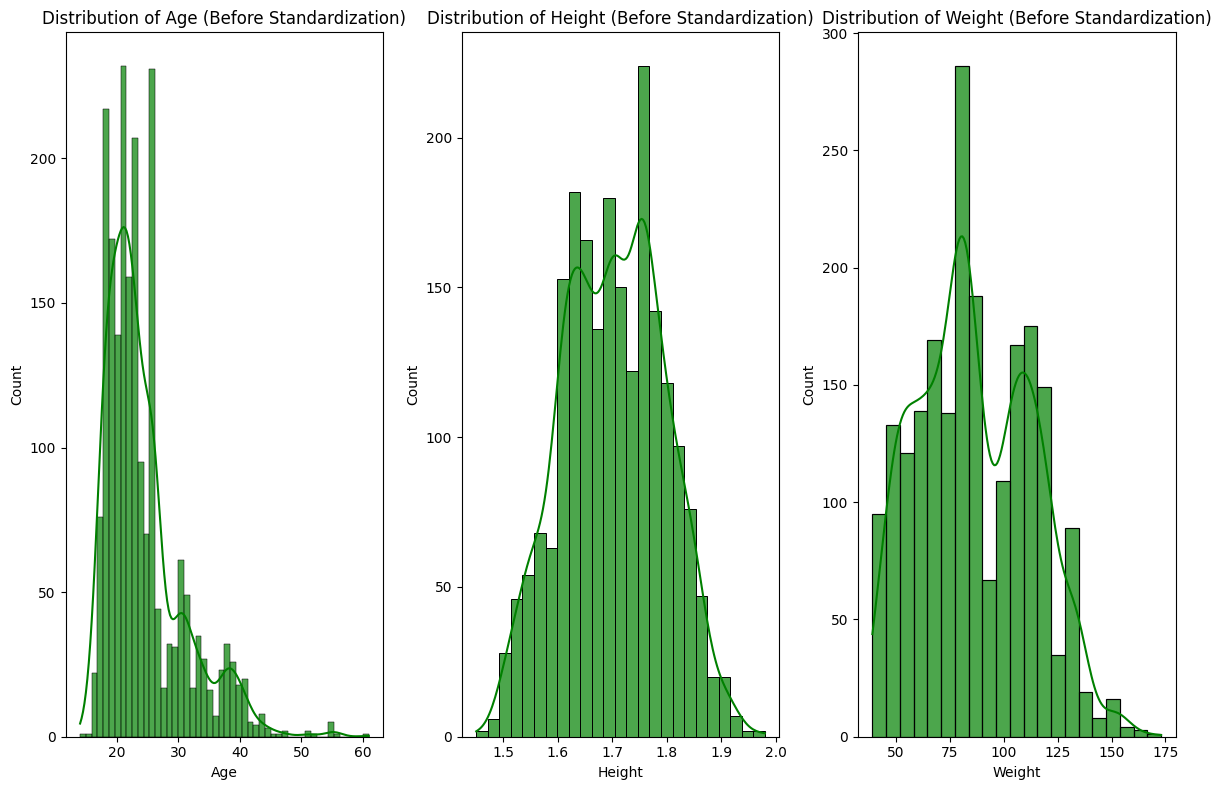

In [27]:
plt.figure(figsize=(12, 8))

for i, column in enumerate(['Age', 'Height', 'Weight'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, color='green', alpha=0.7)
    plt.title(f'Distribution of {column} (Before Standardization)')

plt.tight_layout()
plt.show()


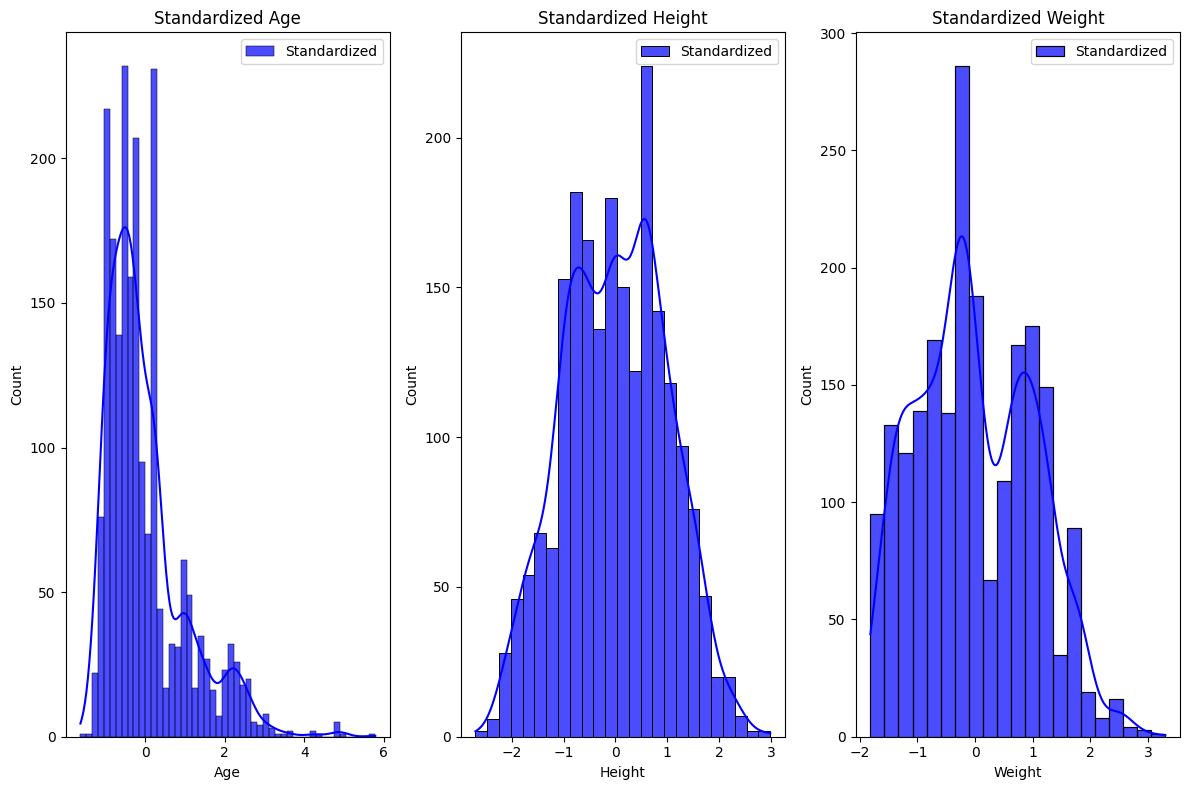

In [28]:
from sklearn.preprocessing import StandardScaler

df_original = df[['Age', 'Height', 'Weight']].copy()

scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])

plt.figure(figsize=(12, 8))

for i, column in enumerate(['Age', 'Height', 'Weight'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], kde=True, color='blue', alpha=0.7, label='Standardized')
    plt.title(f'Standardized {column}')
    plt.legend()

plt.tight_layout()
plt.show()


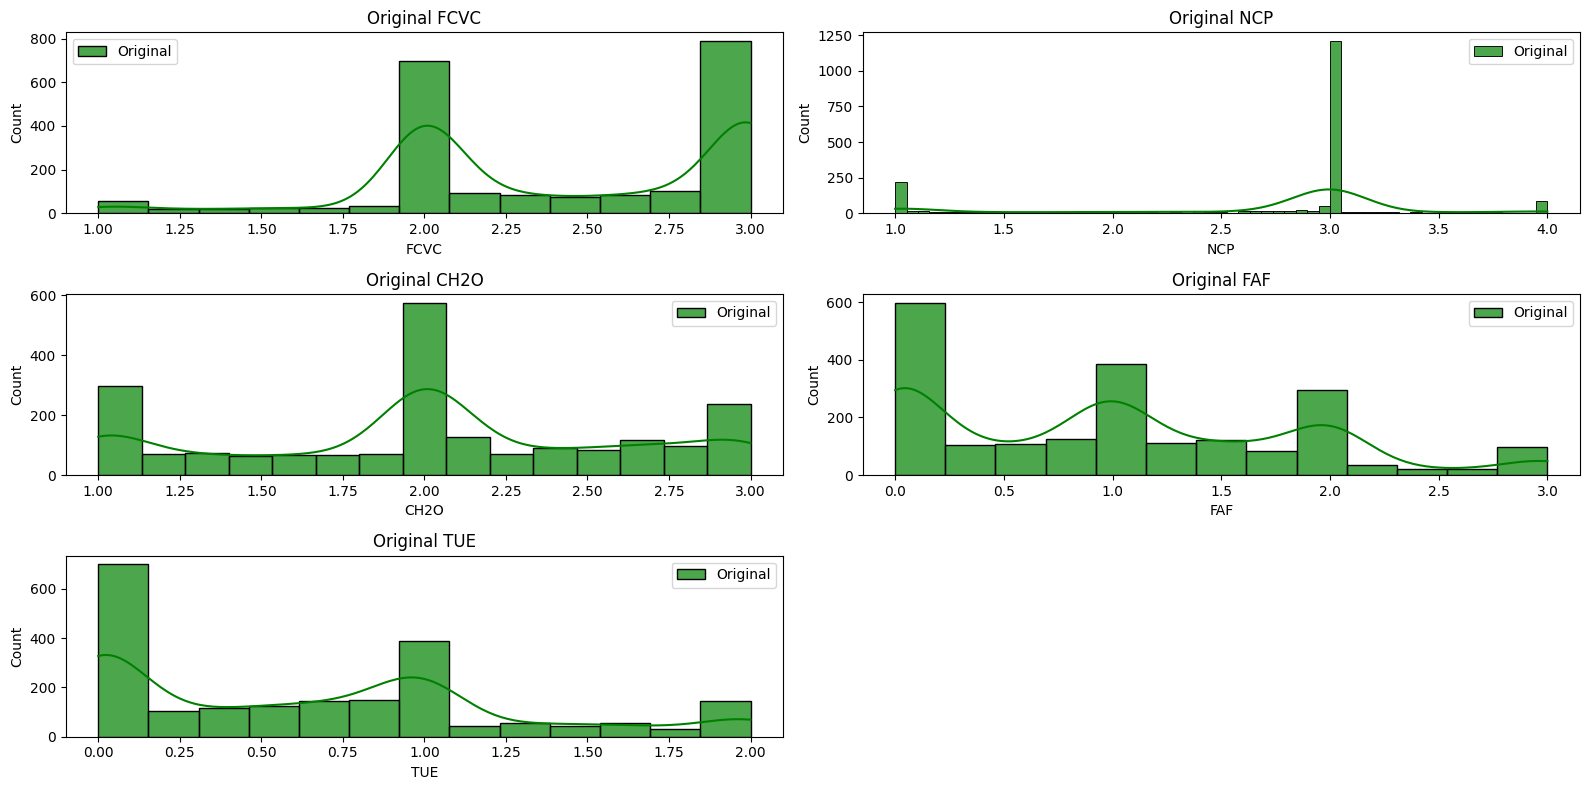

In [29]:
df_original = df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].copy()

plt.figure(figsize=(16, 8))

for i, column in enumerate(['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df_original[column], kde=True, color='green', alpha=0.7, label='Original')
    plt.title(f'Original {column}')
    plt.legend()

plt.tight_layout()
plt.show()

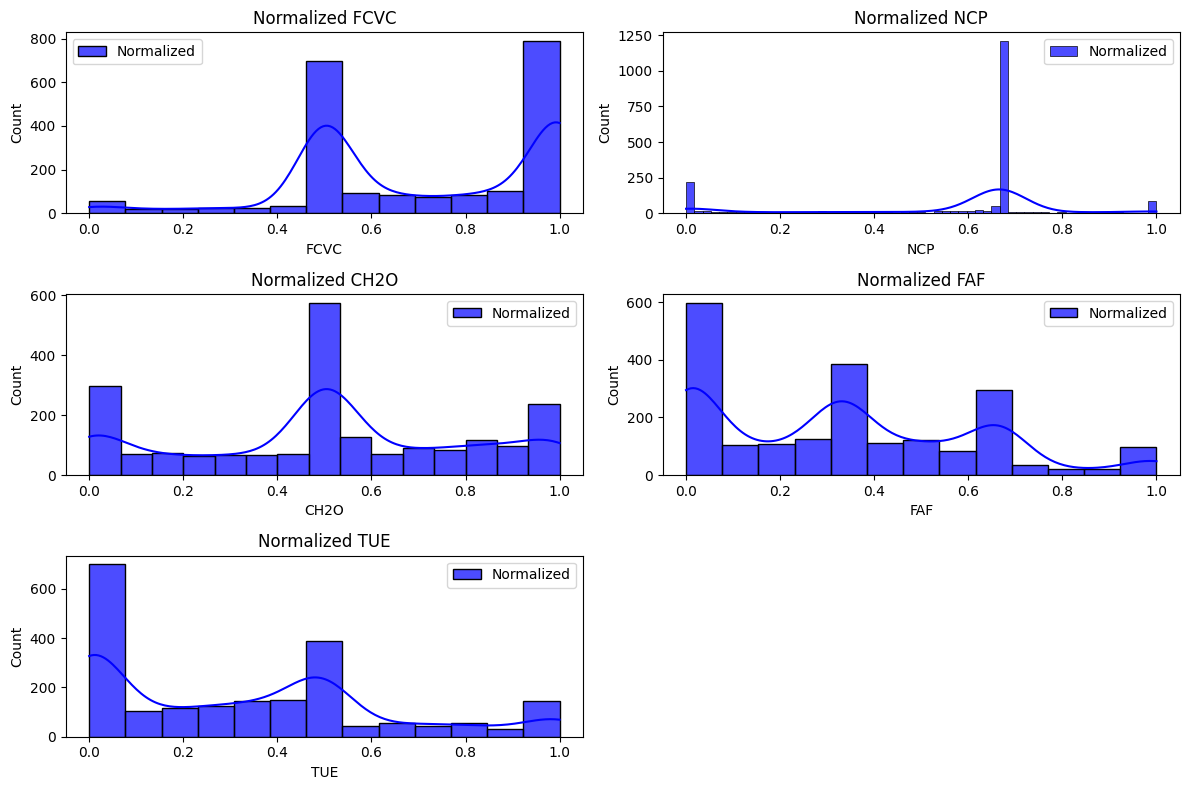

In [30]:
from sklearn.preprocessing import MinMaxScaler


df_original = df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']].copy()

scaler = MinMaxScaler()
df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']] = scaler.fit_transform(df[['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']])

plt.figure(figsize=(12, 8))

for i, column in enumerate(['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[column], kde=True, color='blue', alpha=0.7, label='Normalized')
    plt.title(f'Normalized {column}')
    plt.legend()

plt.tight_layout()
plt.show()


In [31]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,0.5,0.666667,2,0,0.500000,0,0.000000,0.500000,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.0,0.666667,2,1,1.000000,1,1.000000,0.000000,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,0.5,0.666667,2,0,0.500000,0,0.666667,0.500000,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.0,0.666667,2,0,0.500000,0,0.666667,0.000000,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,0.5,0.000000,2,0,0.500000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1,1.0,0.666667,2,0,0.364070,0,0.558756,0.453124,2,3,4
2107,0,-0.367195,0.502844,1.800914,1,1,1.0,0.666667,2,0,0.502565,0,0.447130,0.299635,2,3,4
2108,0,-0.281909,0.541672,1.798868,1,1,1.0,0.666667,2,0,0.527097,0,0.471403,0.323144,2,3,4
2109,0,0.007776,0.404927,1.785780,1,1,1.0,0.666667,2,0,0.926170,0,0.379702,0.293017,2,3,4


  Feature  ANOVA Score
2  Weight  1966.518018
3    FCVC   112.315462
0     Age    77.954154
1  Height    38.432313
4     NCP    26.811662
6     FAF    17.484200
5    CH2O    16.171142
7     TUE     7.876656


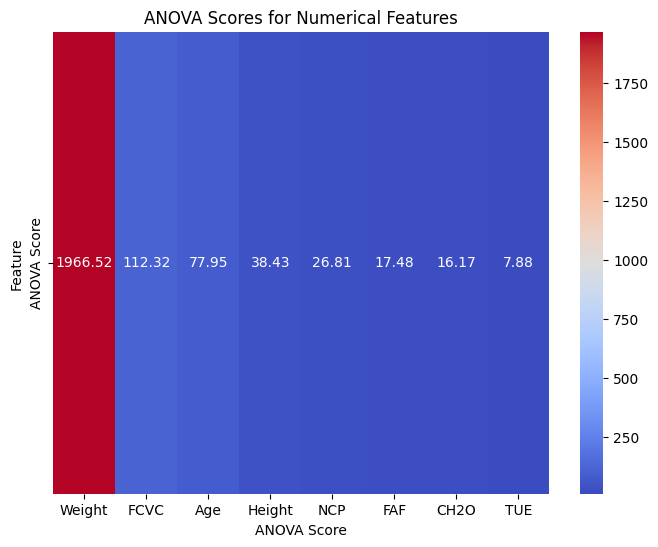

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif



features_numerical = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


X = df[features_numerical].fillna(0)
y = df['NObeyesdad']  

selector = SelectKBest(f_classif, k='all')
X_selected = selector.fit_transform(X, y)

# Menampilkan skor ANOVA
anova_scores = pd.DataFrame({
    'Feature': features_numerical,
    'ANOVA Score': selector.scores_
}).sort_values(by='ANOVA Score', ascending=False)

print(anova_scores)

plt.figure(figsize=(8, 6))
sns.heatmap(anova_scores.set_index('Feature').T, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('ANOVA Scores for Numerical Features')
plt.ylabel('Feature')
plt.xlabel('ANOVA Score')
plt.show()


In [33]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0,0.5,0.666667,2,0,0.500000,0,0.000000,0.500000,3,3,1
1,0,-0.522124,-1.947599,-1.168077,1,0,1.0,0.666667,2,1,1.000000,1,1.000000,0.000000,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0,0.5,0.666667,2,0,0.500000,0,0.666667,0.500000,1,3,1
3,1,0.423582,1.054029,0.015808,0,0,1.0,0.666667,2,0,0.500000,0,0.666667,0.000000,1,4,5
4,1,-0.364507,0.839627,0.122740,0,0,0.5,0.000000,2,0,0.500000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1,1.0,0.666667,2,0,0.364070,0,0.558756,0.453124,2,3,4
2107,0,-0.367195,0.502844,1.800914,1,1,1.0,0.666667,2,0,0.502565,0,0.447130,0.299635,2,3,4
2108,0,-0.281909,0.541672,1.798868,1,1,1.0,0.666667,2,0,0.527097,0,0.471403,0.323144,2,3,4
2109,0,0.007776,0.404927,1.785780,1,1,1.0,0.666667,2,0,0.926170,0,0.379702,0.293017,2,3,4


                          Feature  Chi-Square Score
6                          Gender        324.978359
3                             SCC        117.429254
0  family_history_with_overweight        113.435378
5                          MTRANS        102.780885
2                           SMOKE         31.467977
1                            FAVC         27.081298
4                            CALC         21.819606


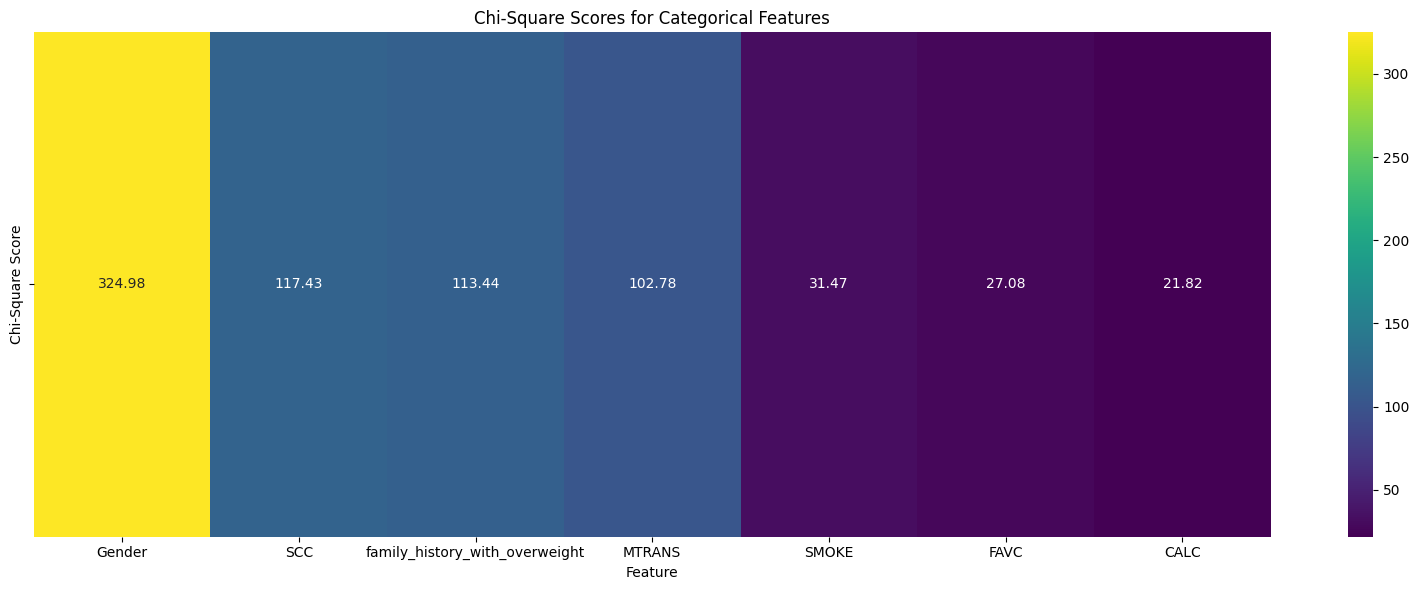

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

features_kategorikal = ['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Gender']

X_cat = df[features_kategorikal]
y = df['NObeyesdad']

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

selector = SelectKBest(chi2, k='all')  
X_selected = selector.fit_transform(X_cat, y)

chi_square_scores = pd.DataFrame({
    'Feature': features_kategorikal,
    'Chi-Square Score': selector.scores_
}).sort_values(by='Chi-Square Score', ascending=False)

print(chi_square_scores)

plt.figure(figsize=(16, 6))  
sns.heatmap(chi_square_scores.set_index('Feature').T, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Chi-Square Scores for Categorical Features')

plt.xticks(rotation=0)
plt.gcf().tight_layout()  

plt.xlabel('Feature')
plt.show()



In [35]:
df = df.drop(columns=['SMOKE', 'FAVC', 'CALC', 'TUE', 'CH2O', 'FAF'])

print(df.head())


   Gender       Age    Height    Weight  family_history_with_overweight  FCVC  \
0       0 -0.522124 -0.875589 -0.862558                               1   0.5   
1       0 -0.522124 -1.947599 -1.168077                               1   1.0   
2       1 -0.206889  1.054029 -0.366090                               1   0.5   
3       1  0.423582  1.054029  0.015808                               0   1.0   
4       1 -0.364507  0.839627  0.122740                               0   0.5   

        NCP  CAEC  SCC  MTRANS  NObeyesdad  
0  0.666667     2    0       3           1  
1  0.666667     2    1       3           1  
2  0.666667     2    0       3           1  
3  0.666667     2    0       4           5  
4  0.000000     2    0       3           6  


In [36]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,SCC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0.5,0.666667,2,0,3,1
1,0,-0.522124,-1.947599,-1.168077,1,1.0,0.666667,2,1,3,1
2,1,-0.206889,1.054029,-0.366090,1,0.5,0.666667,2,0,3,1
3,1,0.423582,1.054029,0.015808,0,1.0,0.666667,2,0,4,5
4,1,-0.364507,0.839627,0.122740,0,0.5,0.000000,2,0,3,6
...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1.0,0.666667,2,0,3,4
2107,0,-0.367195,0.502844,1.800914,1,1.0,0.666667,2,0,3,4
2108,0,-0.281909,0.541672,1.798868,1,1.0,0.666667,2,0,3,4
2109,0,0.007776,0.404927,1.785780,1,1.0,0.666667,2,0,3,4


Jumlah data training: 1688 samples
Jumlah data testing: 423 samples

Bentuk dataset sebelum penghapusan fitur:
X_train: (1688, 10)
X_test: (423, 10)

Total skor Feature Importance: 1.0000
Threshold berdasarkan persentil ke-10: 0.0242

Fitur dengan skor rendah yang bisa dihapus (di bawah threshold 0.0242):
SCC: 0.0065


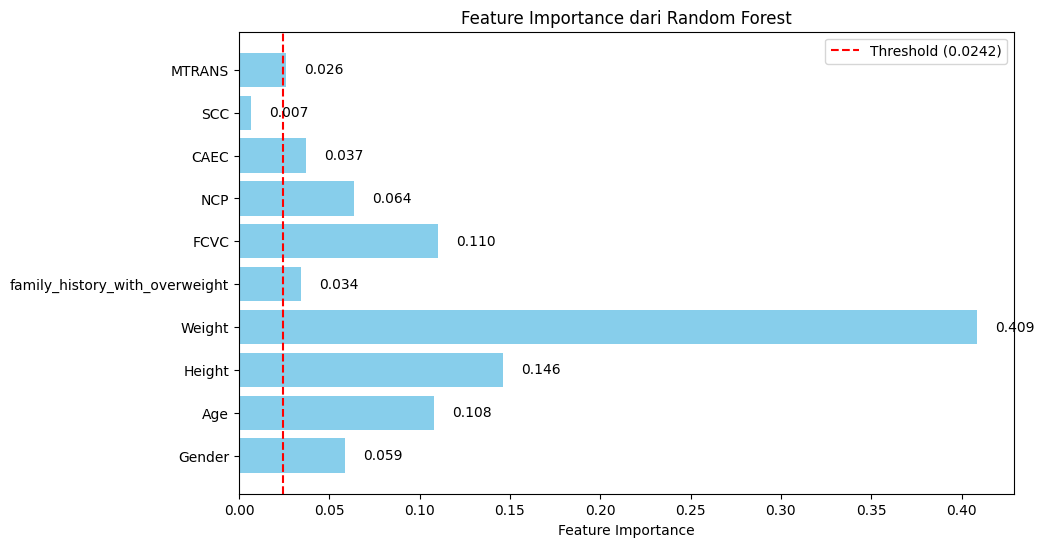


Fitur setelah dihapus: ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FCVC', 'NCP', 'CAEC', 'MTRANS']

Bentuk dataset setelah penghapusan fitur:
X_train: (1688, 9)
X_test: (423, 9)

Akurasi setelah penghapusan fitur: 0.9574


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah data training: {X_train.shape[0]} samples")
print(f"Jumlah data testing: {X_test.shape[0]} samples")
print(f"\nBentuk dataset sebelum penghapusan fitur:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

total_score = np.sum(feature_importance)
print(f"\nTotal skor Feature Importance: {total_score:.4f}")

percentile = 10
threshold = np.percentile(feature_importance, percentile)
print(f"Threshold berdasarkan persentil ke-{percentile}: {threshold:.4f}")

low_impact_features = X.columns[feature_importance < threshold]

print(f"\nFitur dengan skor rendah yang bisa dihapus (di bawah threshold {threshold:.4f}):")
for feature, score in zip(X.columns[feature_importance < threshold], feature_importance[feature_importance < threshold]):
    print(f"{feature}: {score:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importance, color='skyblue')
plt.axvline(x=threshold, color='red', linestyle='--', label=f'Threshold ({threshold:.4f})')
plt.xlabel('Feature Importance')
plt.title('Feature Importance dari Random Forest')
plt.legend()

for i, v in enumerate(feature_importance):
    plt.text(v + 0.01, i, f"{v:.3f}", va='center', color='black')

plt.show()

X_train_reduced = X_train.drop(columns=low_impact_features)
X_test_reduced = X_test.drop(columns=low_impact_features)

print(f"\nFitur setelah dihapus: {X_train_reduced.columns.tolist()}")
print(f"\nBentuk dataset setelah penghapusan fitur:")
print(f"X_train: {X_train_reduced.shape}")
print(f"X_test: {X_test_reduced.shape}")

model.fit(X_train_reduced, y_train)
y_pred = model.predict(X_test_reduced)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi setelah penghapusan fitur: {accuracy:.4f}")

In [38]:
df.drop(columns=["SCC"])

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,NCP,CAEC,MTRANS,NObeyesdad
0,0,-0.522124,-0.875589,-0.862558,1,0.5,0.666667,2,3,1
1,0,-0.522124,-1.947599,-1.168077,1,1.0,0.666667,2,3,1
2,1,-0.206889,1.054029,-0.366090,1,0.5,0.666667,2,3,1
3,1,0.423582,1.054029,0.015808,0,1.0,0.666667,2,4,5
4,1,-0.364507,0.839627,0.122740,0,0.5,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.525774,0.097045,1.711763,1,1.0,0.666667,2,3,4
2107,0,-0.367195,0.502844,1.800914,1,1.0,0.666667,2,3,4
2108,0,-0.281909,0.541672,1.798868,1,1.0,0.666667,2,3,4
2109,0,0.007776,0.404927,1.785780,1,1.0,0.666667,2,3,4


# Final Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score


# Memilih fitur yang telah diseleksi
# Ensure selected_features only contains columns present in df
selected_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'family_history_with_overweight', 'CAEC', 'SCC', 'Gender', 'MTRANS']
target = 'NObeyesdad'

# Membagi dataset menjadi train dan test
X = df[selected_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Support Vector Machine": SVC(kernel='rbf', C=1.0, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Melatih dan mengevaluasi setiap model
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"Accuracy for {name}: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

# Menampilkan hasil akurasi dari semua model
# Menampilkan hasil F1-score dari semua model
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'F1-Score'])
print(results_df.sort_values(by='F1-Score', ascending=False))

Training Random Forest...
Accuracy for Random Forest: 0.9480
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        56
           1       0.89      0.90      0.90        62
           2       0.97      0.95      0.96        78
           3       0.98      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.88      0.88      0.88        56
           6       0.92      0.98      0.95        50

    accuracy                           0.95       423
   macro avg       0.95      0.95      0.95       423
weighted avg       0.95      0.95      0.95       423

--------------------------------------------------
Training Support Vector Machine...
Accuracy for Support Vector Machine: 0.9125
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        56
           1       0.92      0.76      0.83        62
           2       0.99      0.91      0.95      

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training KNN...
Training SVM...
Training Random Forest...
Training XGBoost...


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

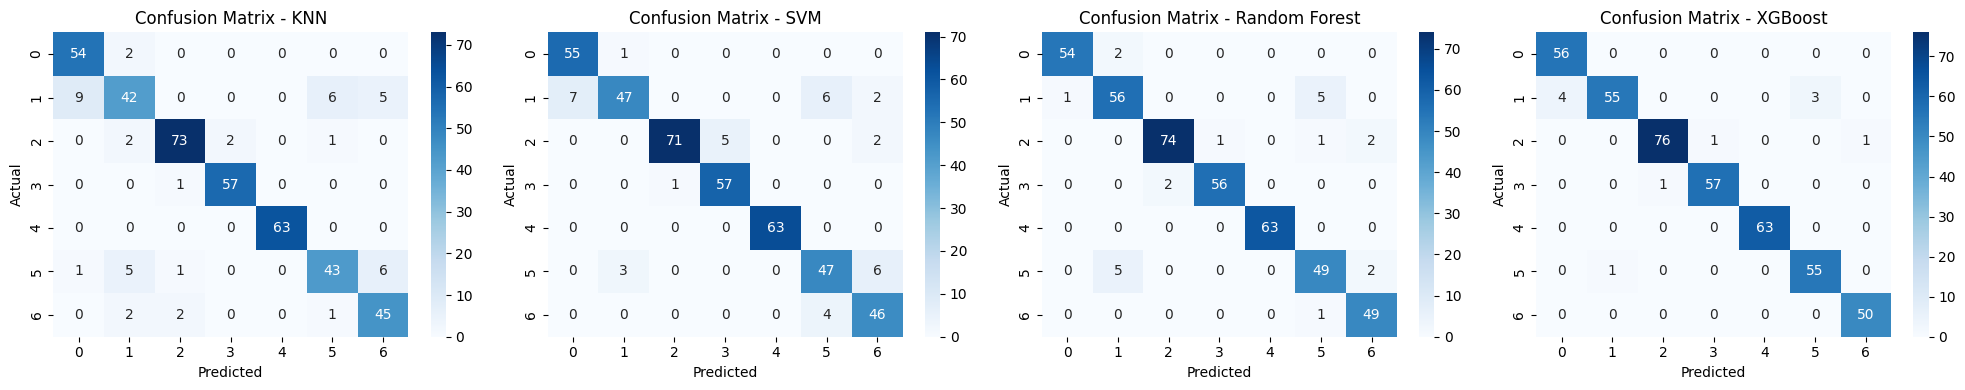

Model F1-Score Comparison (Train vs Test):
KNN: Train = 0.9166, Test = 0.8892, CV = 0.8568
SVM: Train = 0.9280, Test = 0.9118, CV = 0.8956
Random Forest: Train = 1.0000, Test = 0.9481, CV = 0.9493
XGBoost: Train = 1.0000, Test = 0.9737, CV = 0.9650

Overfitting Check:
KNN does not seem to be overfitting (Train: 0.9166, Test: 0.8892)
SVM does not seem to be overfitting (Train: 0.9280, Test: 0.9118)
Random Forest does not seem to be overfitting (Train: 1.0000, Test: 0.9481)
XGBoost does not seem to be overfitting (Train: 1.0000, Test: 0.9737)


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score

def plot_confusion_matrices(models, X_train, X_test, y_train, y_test):
    results_train = {}
    results_test = {}
    cv_results = {}
    conf_matrices = {}
    
    fig, axes = plt.subplots(1, len(models), figsize=(len(models) * 5, 4))
    if len(models) == 1:
        axes = [axes]
    
    for i, (name, model) in enumerate(models.items()):
        print(f"Training {name}...")
        model.fit(X_train, y_train)
        
        # Train F1-score
        y_train_pred = model.predict(X_train)
        train_f1 = f1_score(y_train, y_train_pred, average='weighted')
        results_train[name] = train_f1
        
        # Test F1-score
        y_test_pred = model.predict(X_test)
        test_f1 = f1_score(y_test, y_test_pred, average='weighted')
        results_test[name] = test_f1
        
        # Cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')
        cv_results[name] = cv_scores.mean()
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_test_pred)
        conf_matrices[name] = cm
        
        # Plot confusion matrix
        ax = axes[i]
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_, ax=ax)
        ax.set_title(f'Confusion Matrix - {name}')
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
    
    plt.tight_layout()
    plt.show()
    
    return results_train, results_test, cv_results, conf_matrices

# Define models
test_models = {
    "KNN": knn,
    "SVM": svm,
    "Random Forest": rf,
    "XGBoost": xgb
}

# Train models and plot confusion matrices
results_train, results_test, cv_results, conf_matrices = plot_confusion_matrices(test_models, X_train, X_test, y_train, y_test)

# Print F1-score comparison
print("Model F1-Score Comparison (Train vs Test):")
for name in results_train:
    print(f"{name}: Train = {results_train[name]:.4f}, Test = {results_test[name]:.4f}, CV = {cv_results[name]:.4f}")
    
# Check for overfitting
print("\nOverfitting Check:")
for name in results_train:
    diff = results_train[name] - results_test[name]
    if diff > 0.1:
        print(f"{name} may be overfitting (Train: {results_train[name]:.4f}, Test: {results_test[name]:.4f})")
    else:
        print(f"{name} does not seem to be overfitting (Train: {results_train[name]:.4f}, Test: {results_test[name]:.4f})")

In [41]:
# Menampilkan hasil akurasi dan F1-score dari semua model dalam tabel
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print(results_df.sort_values(by='Accuracy', ascending=False))

                    Model  Accuracy
3                 XGBoost  0.973995
0           Random Forest  0.947991
1  Support Vector Machine  0.912530
2     K-Nearest Neighbors  0.891253


In [42]:
import pickle

# Simpan model terbaik
best_model = max(results, key=results.get)
with open("trained_model_fix.pkl", "wb") as model_file:
    pickle.dump((scaler, models[best_model]), model_file)

# Fungsi untuk memuat model dan melakukan prediksi
def predict_obesity(features):
    with open("trained_model_fix.pkl", "rb") as model_file:
        scaler, model = pickle.load(model_file)
    
    features = np.array(features).reshape(1, -1)
    
    # Pastikan fitur memiliki urutan yang sama
    features_df = pd.DataFrame(features, columns=X.columns)
    features_df = features_df.reindex(columns=X.columns, fill_value=0)
    features_scaled = scaler.transform(features_df)
    
    prediction = model.predict(features_scaled)
    
    return label_encoder.inverse_transform(prediction)[0]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:36:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


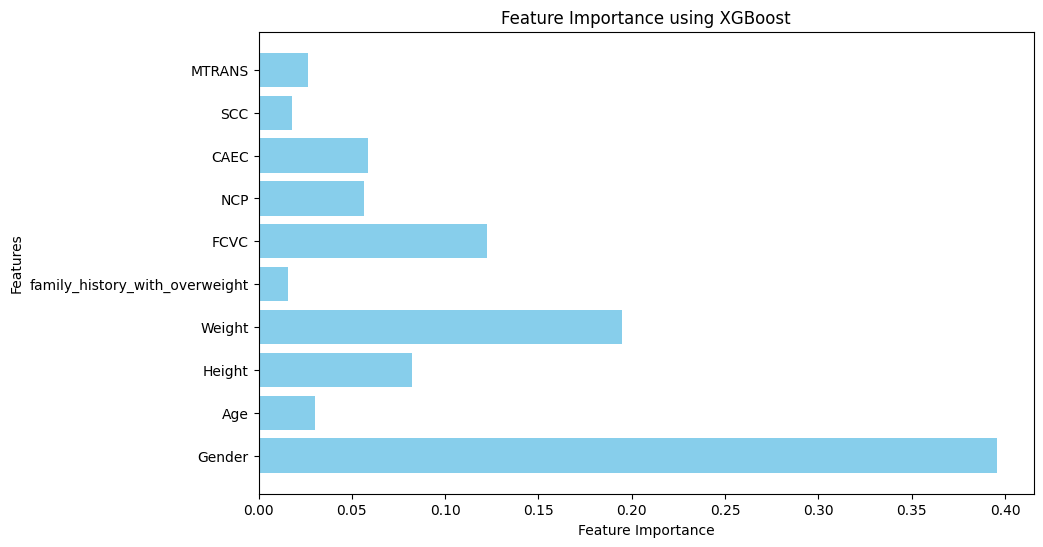

In [43]:

# Encode categorical variables if necessary
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numerical using LabelEncoder
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split data into features and target
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

# Train XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X, y)

# Plot feature importance
import matplotlib.pyplot as plt
importances = xgb_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance using XGBoost")
plt.show()


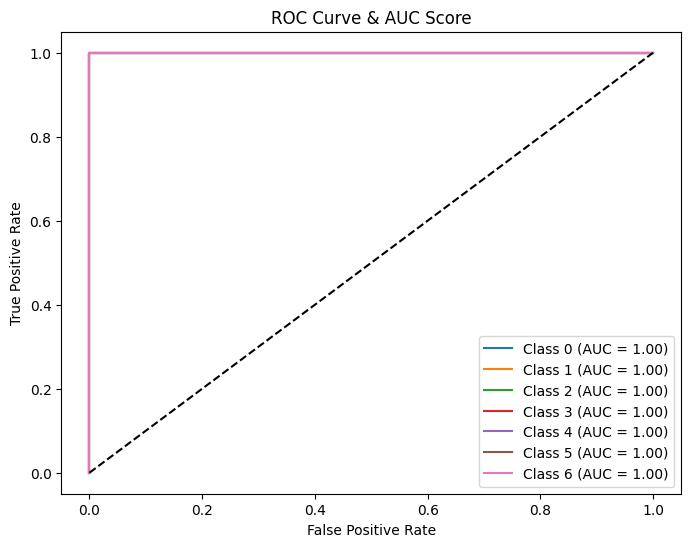

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:158: UserWarning: [04:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are no

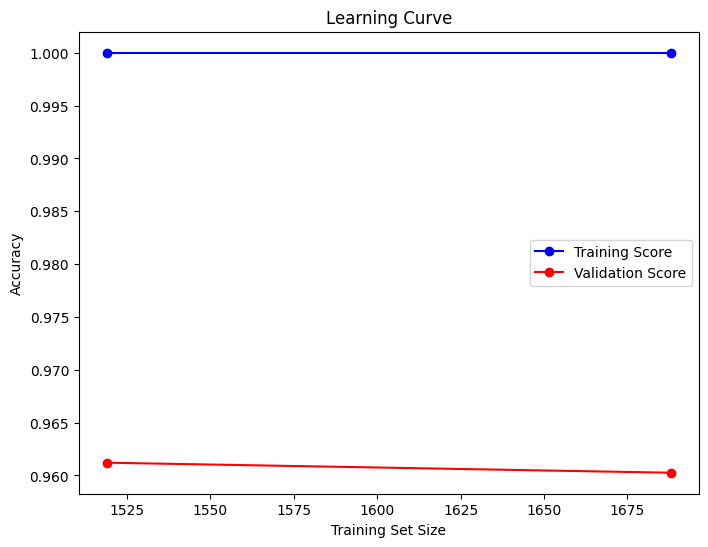

In [45]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

# 1. ROC Curve & AUC Score
y_proba = xgb_model.predict_proba(X)  # Probabilitas prediksi
n_classes = len(np.unique(y))  # Jumlah kelas

plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y == i, y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve & AUC Score")
plt.legend()
plt.show()

# 2. Learning Curve
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training Score", color="blue")
plt.plot(train_sizes, test_mean, 'o-', label="Validation Score", color="red")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()
